# Initialisation du projet

In [4]:
# Installons les bibliothèques nécessaires 
!pip install numpy pandas matplotlib seaborn jupyter

In [5]:
# Chargeons les données
import pandas as pd
data = pd.read_csv("C:/Users/mfcho/OneDrive/Documents/Data Engeneering/ProjetPython1/QUOT_SIM2_previous-2020-202404.csv", sep=';')

In [6]:
# Affichons les 5 premières lignes du dataset
print(data.head())

   LAMBX  LAMBY      DATE  PRENEI_Q  PRELIQ_Q   T_Q  FF_Q    Q_Q   DLI_Q  \
0    600  24010  20200101       0.0       0.4   9.9   2.1  7.414  3161.6   
1    600  24010  20200102       0.0       0.6  11.3   5.5  7.396  2955.5   
2    600  24010  20200103       0.0       0.8   9.6   6.1  6.458  3066.2   
3    600  24010  20200104       0.0       0.0   8.1   2.7  5.230  2564.4   
4    600  24010  20200105       0.0       0.0   7.2   3.3  5.125  2774.9   

   SSI_Q  ...  RESR_NEIGE6_Q  HTEURNEIGE_Q  HTEURNEIGE6_Q  HTEURNEIGEX_Q  \
0  111.1  ...            0.0           0.0            0.0            0.0   
1   55.2  ...            0.0           0.0            0.0            0.0   
2   56.5  ...            0.0           0.0            0.0            0.0   
3  142.7  ...            0.0           0.0            0.0            0.0   
4  115.8  ...            0.0           0.0            0.0            0.0   

   SNOW_FRAC_Q  ECOULEMENT_Q  WG_RACINE_Q  WGI_RACINE_Q  TINF_H_Q  TSUP_H_Q  
0       

In [7]:
# Affichons les informations sur les colonnes et le type de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15649144 entries, 0 to 15649143
Data columns (total 28 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LAMBX          int64  
 1   LAMBY          int64  
 2   DATE           int64  
 3   PRENEI_Q       float64
 4   PRELIQ_Q       float64
 5   T_Q            float64
 6   FF_Q           float64
 7   Q_Q            float64
 8   DLI_Q          float64
 9   SSI_Q          float64
 10  HU_Q           float64
 11  EVAP_Q         float64
 12  ETP_Q          float64
 13  PE_Q           float64
 14  SWI_Q          float64
 15  DRAINC_Q       float64
 16  RUNC_Q         float64
 17  RESR_NEIGE_Q   float64
 18  RESR_NEIGE6_Q  float64
 19  HTEURNEIGE_Q   float64
 20  HTEURNEIGE6_Q  float64
 21  HTEURNEIGEX_Q  float64
 22  SNOW_FRAC_Q    float64
 23  ECOULEMENT_Q   float64
 24  WG_RACINE_Q    float64
 25  WGI_RACINE_Q   float64
 26  TINF_H_Q       float64
 27  TSUP_H_Q       float64
dtypes: float64(25), int64(3)
memory usage: 3

In [8]:
# Affichons les statistiques descriptives sur les colonnes numériques
print(data.describe())

              LAMBX         LAMBY          DATE      PRENEI_Q      PRELIQ_Q  \
count  1.564914e+07  1.564914e+07  1.564914e+07  1.564914e+07  1.564914e+07   
mean   6.553951e+03  2.177298e+04  2.021754e+07  2.003113e-01  2.345068e+00   
std    2.427485e+03  2.349840e+03  1.258544e+04  1.829282e+00  5.446155e+00   
min    6.000000e+02  1.617000e+04  2.020010e+07  0.000000e+00  0.000000e+00   
25%    4.680000e+03  1.977000e+04  2.021013e+07  0.000000e+00  0.000000e+00   
50%    6.440000e+03  2.201000e+04  2.022030e+07  0.000000e+00  1.000000e-01   
75%    8.440000e+03  2.369000e+04  2.023040e+07  0.000000e+00  2.100000e+00   
max    1.196000e+04  2.681000e+04  2.024043e+07  3.151000e+02  3.165000e+02   

                T_Q          FF_Q           Q_Q         DLI_Q         SSI_Q  \
count  1.564914e+07  1.564914e+07  1.564914e+07  1.564914e+07  1.564914e+07   
mean   1.140852e+01  2.867923e+00  6.993815e+00  2.800864e+03  1.235745e+03   
std    6.996607e+00  1.699225e+00  2.692850e+00  3.

# Préparation des données

In [9]:
# Affichons les valeurs manquantes
print(data.isnull().sum())

LAMBX            0
LAMBY            0
DATE             0
PRENEI_Q         0
PRELIQ_Q         0
T_Q              0
FF_Q             0
Q_Q              0
DLI_Q            0
SSI_Q            0
HU_Q             0
EVAP_Q           0
ETP_Q            0
PE_Q             0
SWI_Q            0
DRAINC_Q         0
RUNC_Q           0
RESR_NEIGE_Q     0
RESR_NEIGE6_Q    0
HTEURNEIGE_Q     0
HTEURNEIGE6_Q    0
HTEURNEIGEX_Q    0
SNOW_FRAC_Q      0
ECOULEMENT_Q     0
WG_RACINE_Q      0
WGI_RACINE_Q     0
TINF_H_Q         0
TSUP_H_Q         0
dtype: int64


In [10]:
# Convertissons la colonne de date au format datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

In [11]:
# Supprimons les valeurs de température en dehors de la plage réaliste
data = data[(data['T_Q'] >= -50) & (data['T_Q'] <= 50)]

In [12]:
# On va extraire l'année, le mois et le jour à partir de la colonne date
data['année'] = data['DATE'].dt.year
data['mois'] = data['DATE'].dt.month
data['jour'] = data['DATE'].dt.day

In [13]:
# Agrégation des données
temp_moyenne_par_mois = temp_moyenne_par_mois = data.groupby('mois')['T_Q'].mean() 
precipitations_annuelles = precipitations_annuelles = data.groupby('année')['PRELIQ_Q'].sum()

print("Température moyenne par mois :")
print(temp_moyenne_par_mois)

print("\nPrécipitations annuelles :")
print(precipitations_annuelles)

Température moyenne par mois :
mois
1      3.932243
2      6.282553
3      7.465378
4      9.851716
5     13.973747
6     18.286464
7     19.762209
8     19.621764
9     16.554295
10    12.488323
11     7.569351
12     5.303580
Name: T_Q, dtype: float64

Précipitations annuelles :
année
2020    8574113.3
2021    8730695.1
2022    6830883.0
2023    9286059.1
2024    3276561.2
Name: PRELIQ_Q, dtype: float64


# Analyse exploratoire des données (EDA)

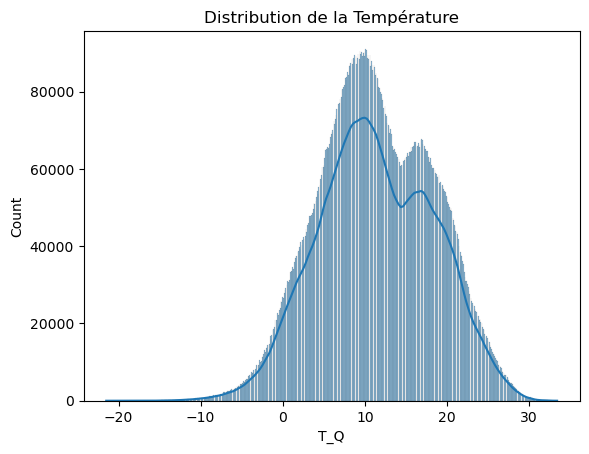

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de la température
sns.histplot(data['T_Q'], kde=True)
plt.title('Distribution de la Température')
plt.show()


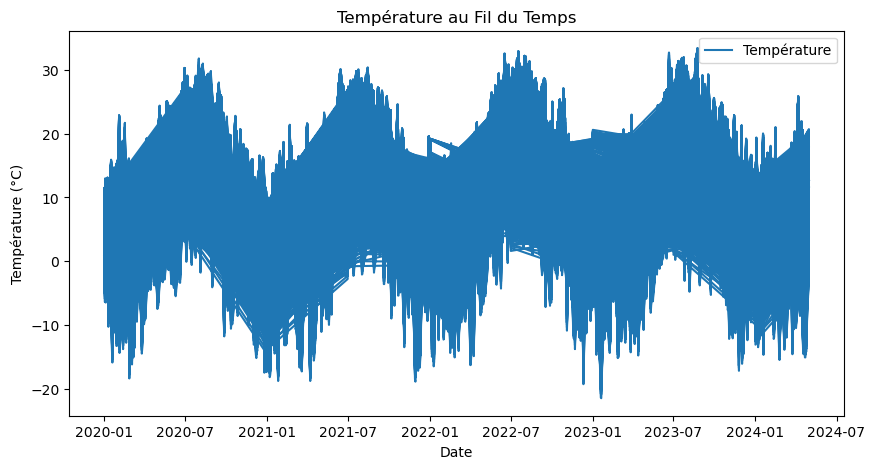

In [17]:
import matplotlib as mpl
# Augmentons la taille des blocs de cellules pour éviter l'OverflowError
mpl.rcParams['agg.path.chunksize'] = 10000

# Graphique de la température au fil du temps
plt.figure(figsize=(10, 5))
plt.plot(data['DATE'], data['T_Q'], label='Température')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température au Fil du Temps')
plt.legend()
plt.show()

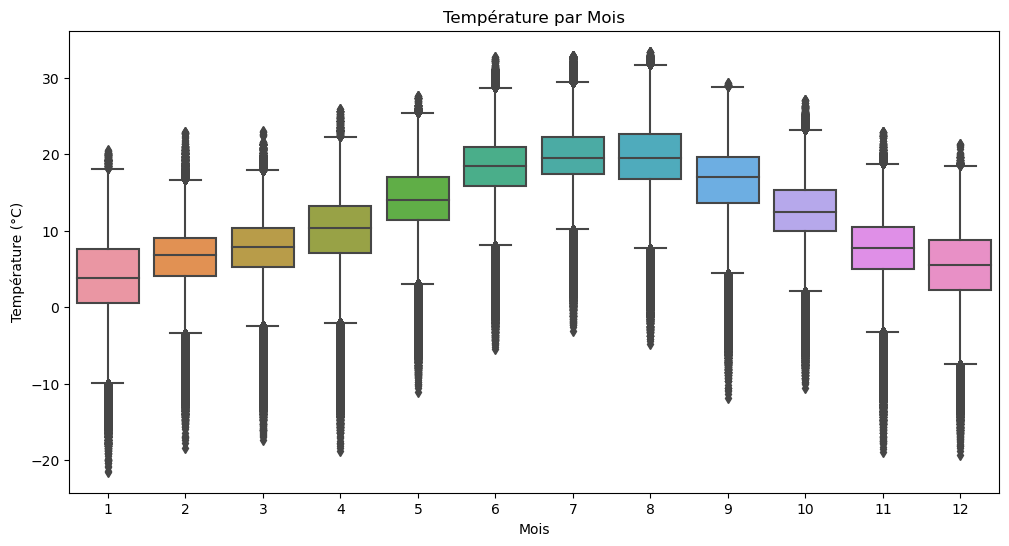

In [18]:
# Boîte à Moustaches pour la Température par Mois
#Visualisons la variabilité et les tendances des températures par mois.

plt.figure(figsize=(12, 6))
sns.boxplot(x='mois', y='T_Q', data=data)
plt.title('Température par Mois')
plt.xlabel('Mois')
plt.ylabel('Température (°C)')
plt.show()

   année  mois        T_Q année_mois
0   2020     1   5.337645     2020-1
1   2020     2   7.196033     2020-2
2   2020     3   6.995665     2020-3
3   2020     4  12.133304     2020-4
4   2020     5  14.736024     2020-5


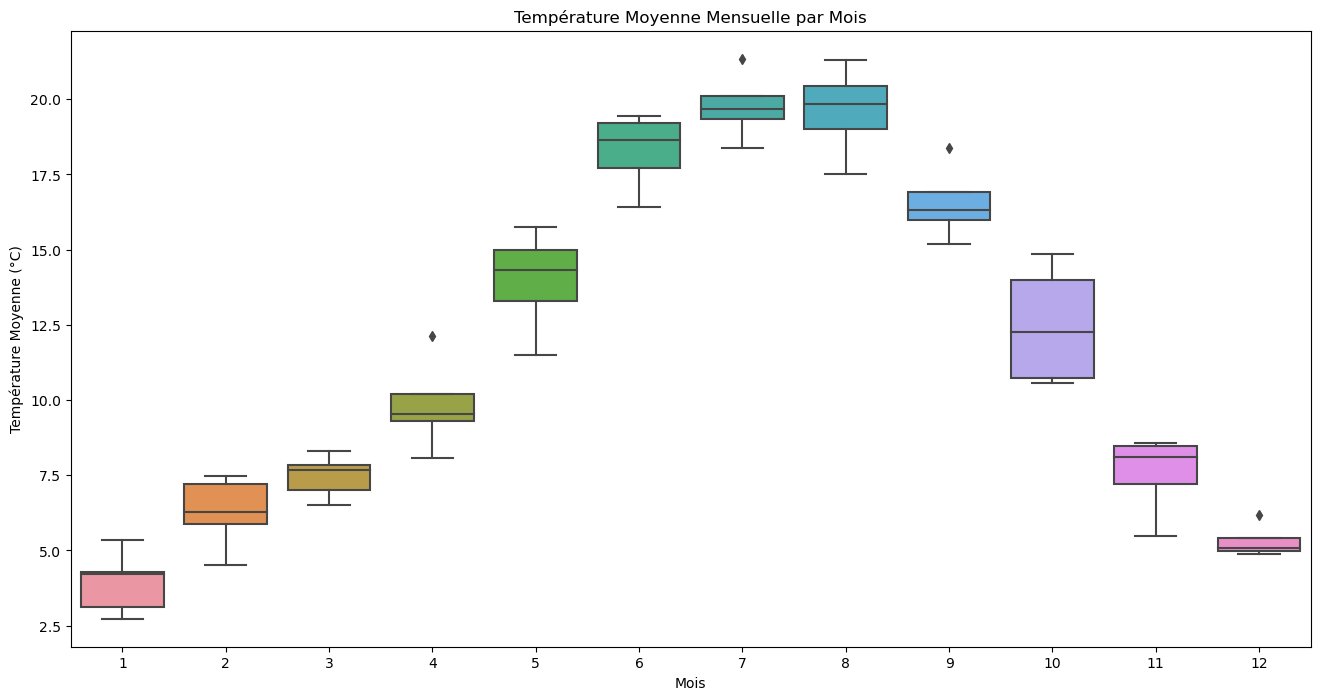

In [22]:
# Calculons la température moyenne pour chaque mois de chaque année
temp_moyenne_mensuelle = data.groupby(['année', 'mois'])['T_Q'].mean().reset_index()

# Créons une colonne 'année_mois' pour la visualisation
temp_moyenne_mensuelle['année_mois'] = temp_moyenne_mensuelle['année'].astype(str) + '-' + temp_moyenne_mensuelle['mois'].astype(str)

# Affichons les 5 premières lignes du dataset agrégé
print(temp_moyenne_mensuelle.head())

# Boîte à moustaches pour la température moyenne mensuelle par mois
plt.figure(figsize=(16, 8))
sns.boxplot(x='mois', y='T_Q', data=temp_moyenne_mensuelle)
plt.title('Température Moyenne Mensuelle par Mois')
plt.xlabel('Mois')
plt.ylabel('Température Moyenne (°C)')
plt.show()

               T_Q  PRELIQ_Q      FF_Q      HU_Q    EVAP_Q
T_Q       1.000000 -0.006772 -0.079724 -0.358814  0.505574
PRELIQ_Q -0.006772  1.000000  0.177748  0.292977 -0.010617
FF_Q     -0.079724  0.177748  1.000000  0.105213 -0.049092
HU_Q     -0.358814  0.292977  0.105213  1.000000 -0.354704
EVAP_Q    0.505574 -0.010617 -0.049092 -0.354704  1.000000


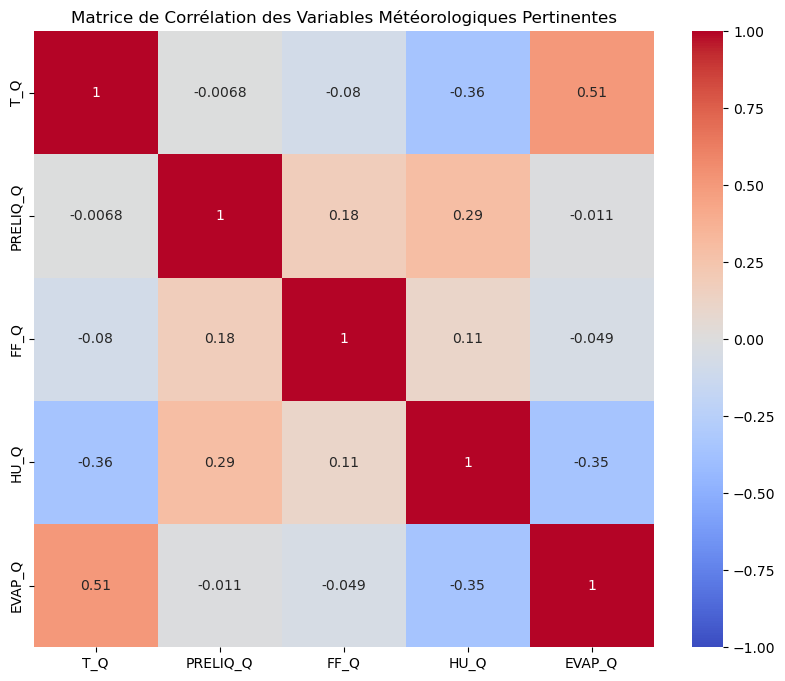

In [24]:
# Sélectionner les variables pertinentes
variables = ['T_Q', 'PRELIQ_Q', 'FF_Q', 'HU_Q', 'EVAP_Q']

# Calculer la matrice de corrélation
corr_matrix = data[variables].corr()

# Afficher la matrice de corrélation
print(corr_matrix)

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Variables Météorologiques Pertinentes')
plt.show()

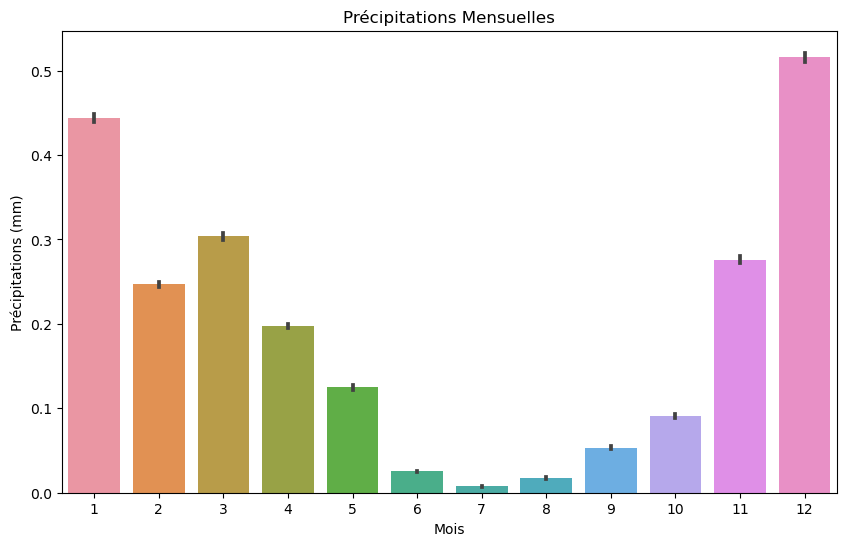

In [25]:
# Diagramme de précipitations mensuelles
plt.figure(figsize=(10, 6))
sns.barplot(x='mois', y='PRENEI_Q', data=data)
plt.title('Précipitations Mensuelles')
plt.xlabel('Mois')
plt.ylabel('Précipitations (mm)')
plt.show()

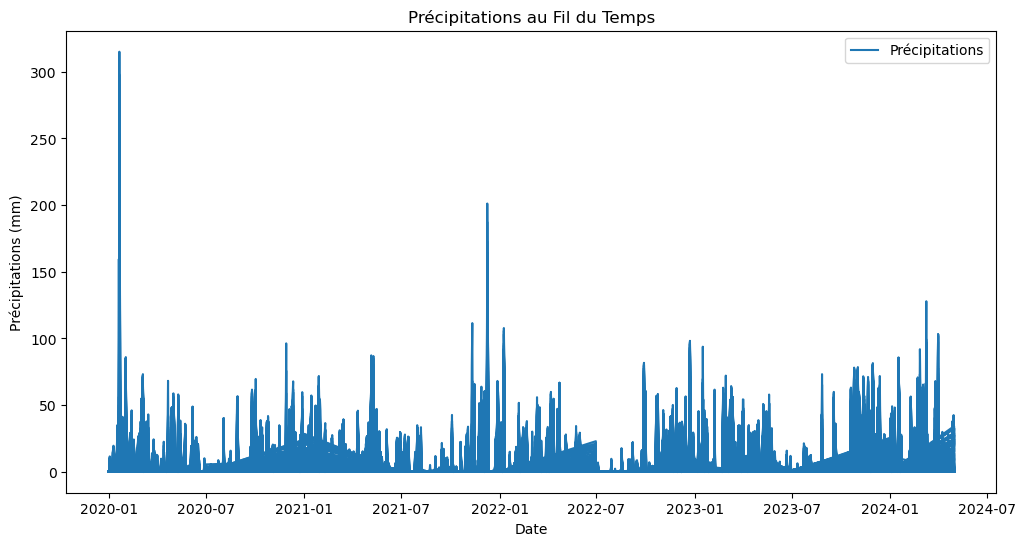

In [26]:
# Série temporelle des précipitations
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['PRENEI_Q'], label='Précipitations')
plt.title('Précipitations au Fil du Temps')
plt.xlabel('Date')
plt.ylabel('Précipitations (mm)')
plt.legend()
plt.show()

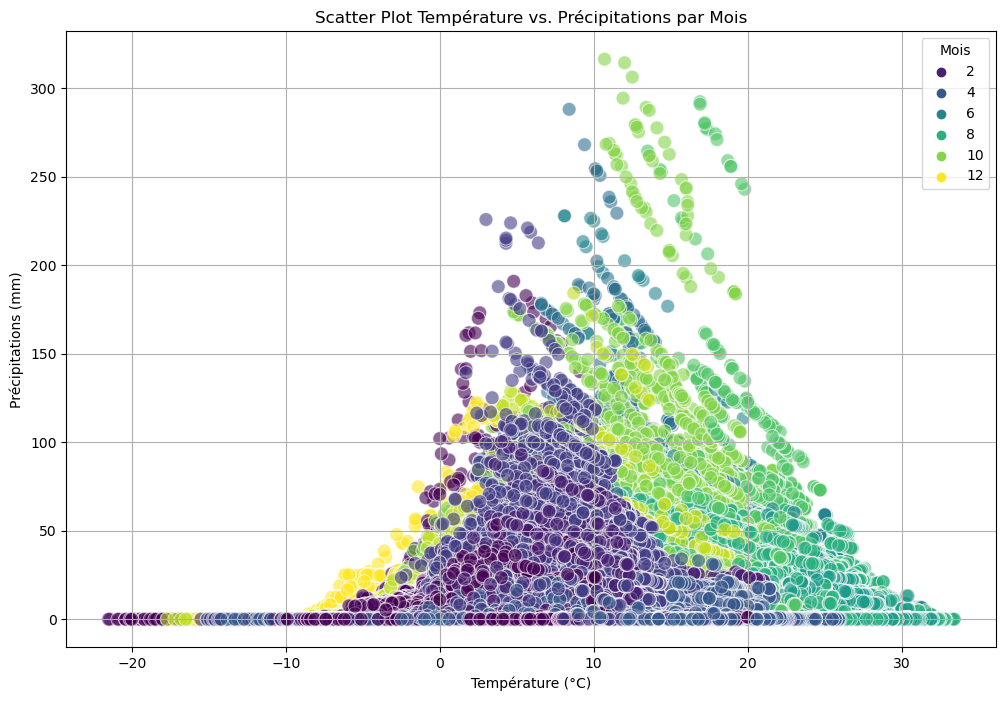

In [28]:
# Sélectionner les variables pertinentes
var = ['T_Q', 'PRELIQ_Q', 'mois']

# Visualisons le scatter plot température vs. précipitations
plt.figure(figsize=(12, 8))

# Utilisons la couleur pour distinguer les différents mois
scatter = sns.scatterplot(x='T_Q', y='PRELIQ_Q', hue='mois', data=data, palette='viridis', alpha=0.6, s=100)

# Ajoutons des titres et des étiquettes d'axes
plt.title('Scatter Plot Température vs. Précipitations par Mois')
plt.xlabel('Température (°C)')
plt.ylabel('Précipitations (mm)')
plt.legend(title='Mois')
plt.grid(True)

# Affichons le graphique
plt.show()

# Modélisation et Prédiction


Caractéristiques Pertinentes

In [29]:
# Extraction de caractéristiques temporelles supplémentaires
data['jour_semaine'] = data['DATE'].dt.dayofweek

In [31]:
# Tri des données par date pour calculer les caractéristiques dérivées
data = data.sort_values(by='DATE')

# Caractéristiques dérivées de la température
data['T_Q_jour_prec'] = data['T_Q'].shift(1)
data['T_Q_var_jour_prec'] = data['T_Q'] - data['T_Q_jour_prec']

# Température moyenne mobile sur 7 jours
data['T_Q_moy_mobile_7j'] = data['T_Q'].rolling(window=7).mean()

# Précipitations cumulées sur 7 jours
data['PRENEI_Q_cumul_7j'] = data['PRENEI_Q'].rolling(window=7).sum()

# Supprimons les premières lignes avec des NaN générés par le calcul des caractéristiques dérivées
data = data.dropna()

# Affichons les premières lignes pour vérifier les nouvelles caractéristiques
print(data.head())

         LAMBX  LAMBY       DATE  PRENEI_Q  PRELIQ_Q  T_Q  FF_Q    Q_Q  \
1401400   8680  20890 2020-01-01       0.0       0.0 -0.1   0.9  3.685   
224770    3640  21050 2020-01-01       0.0       4.6  8.9   1.9  6.968   
268814    3880  18330 2020-01-01       0.0       0.0  7.5   1.3  5.322   
352898    4280  18010 2020-01-01       0.0       0.0  6.5   1.0  5.188   
971334    6680  24170 2020-01-01       0.0       1.1  0.8   3.0  3.995   

          DLI_Q  SSI_Q  ...  TINF_H_Q  TSUP_H_Q  année  mois  jour  \
1401400  2777.1  168.4  ...      -1.5       2.0   2020     1     1   
224770   3183.6   90.3  ...       6.6      10.3   2020     1     1   
268814   2726.8  614.8  ...       6.8      11.1   2020     1     1   
352898   2646.6  825.6  ...       4.9      10.7   2020     1     1   
971334   2780.5  165.0  ...      -0.8       3.8   2020     1     1   

         jour_semaine  T_Q_jour_prec  T_Q_var_jour_prec  T_Q_moy_mobile_7j  \
1401400             2            0.8               -0.9 

Préparation pour la Modélisation


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# Sélectionnons les caractéristiques pertinentes et la variable cible
features = ['année', 'mois', 'jour', 'jour_semaine', 'T_Q_jour_prec', 'T_Q_var_jour_prec', 'T_Q_moy_mobile_7j', 'PRENEI_Q_cumul_7j']
X = data[features]
y = data['T_Q']

# Divisons les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînons le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Réalisons des prédictions
y_pred = model.predict(X_test)

# Évaluons le modèle avec RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE sur l'ensemble de test: {rmse}")

# Validation croisée
rmse_scorer = make_scorer(mean_squared_error, squared=False)
scores = cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)
print(f"Scores de validation croisée: {scores}")
print(f"Score moyen de RMSE: {scores.mean()}")


RMSE sur l'ensemble de test: 8.358149640383994e-14
Scores de validation croisée: [2.01264151e-12 2.49099479e-13 2.21331366e-13 2.08240526e-12
 3.92456706e-13]
Score moyen de RMSE: 9.915868637068212e-13


In [1]:
!pip freeze > requirements.txt